In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Définitions des fonctions statistiques et graphiques des caractéristiques

In [3]:
df = pd.read_csv("/workspaces/datasciencetest_reco_plante/notebooks/Plant_V_Seg_all_features.csv")
df.head()

,ID_Image,Est_Saine,Image_Path,is_black,dimensions,aire,périmètre,circularité,excentricité,aspect_ratio,...,disease_Leaf_blight_(Isariopsis_Leaf_Spot),disease_Leaf_scorch,disease_Northern_Leaf_Blight,disease_Powdery_mildew,disease_Septoria_leaf_spot,disease_Spider_mites Two-spotted_spider_mite,disease_Target_Spot,disease_Tomato_Yellow_Leaf_Curl_Virus,disease_Tomato_mosaic_virus,disease_healthy
0,1,0,/workspaces/datasciencetest_reco_plante/datase...,0,27x53,549.5,224.208151,0.137365,0.908846,0.509434,...,False,False,False,False,False,False,False,False,True,False
1,2,0,/workspaces/datasciencetest_reco_plante/datase...,0,115x94,2425.0,1143.082383,0.023322,0.860274,1.223404,...,False,False,False,False,False,False,False,False,True,False
2,3,0,/workspaces/datasciencetest_reco_plante/datase...,0,73x78,1662.0,807.092487,0.032062,0.841733,0.935897,...,False,False,False,False,False,False,False,False,True,False
3,4,0,/workspaces/datasciencetest_reco_plante/datase...,0,142x170,8371.5,2032.642906,0.025462,0.710637,0.835294,...,False,False,False,False,False,False,False,False,True,False
4,5,0,/workspaces/datasciencetest_reco_plante/datase...,0,31x31,247.5,155.296463,0.128962,0.934820,1.000000,...,False,False,False,False,False,False,False,False,True,False


In [4]:
df.columns

Index(['ID_Image', 'Est_Saine', 'Image_Path', 'is_black', 'dimensions', 'aire',
       'périmètre', 'circularité', 'excentricité', 'aspect_ratio', 'mean_R',
       'mean_G', 'mean_B', 'std_R', 'std_G', 'std_B', 'contrast', 'energy',
       'homogeneity', 'dissimilarite', 'Correlation', 'contour_density',
       'mean_H', 'mean_S', 'mean_V', 'netteté', 'hu_1', 'hu_2', 'hu_3', 'hu_4',
       'hu_5', 'hu_6', 'hu_7', 'plant_Apple', 'plant_Blueberry',
       'plant_Cherry_(including_sour)', 'plant_Corn_(maize)', 'plant_Grape',
       'plant_Orange', 'plant_Peach', 'plant_Pepper,_bell', 'plant_Potato',
       'plant_Raspberry', 'plant_Soybean', 'plant_Squash', 'plant_Strawberry',
       'plant_Tomato', 'disease_Apple_scab', 'disease_Bacterial_spot',
       'disease_Black_rot', 'disease_Cedar_apple_rust',
       'disease_Cercospora_leaf_spot Gray_leaf_spot', 'disease_Common_rust_',
       'disease_Early_blight', 'disease_Esca_(Black_Measles)',
       'disease_Haunglongbing_(Citrus_greening)',

In [5]:
# 1. Vérifier les doublons complets sur tout le DataFrame
n_dup = df.duplicated().sum()
print(f"Il y a {n_dup} doublons exacts dans df.")

Il y a 0 doublons exacts dans df.


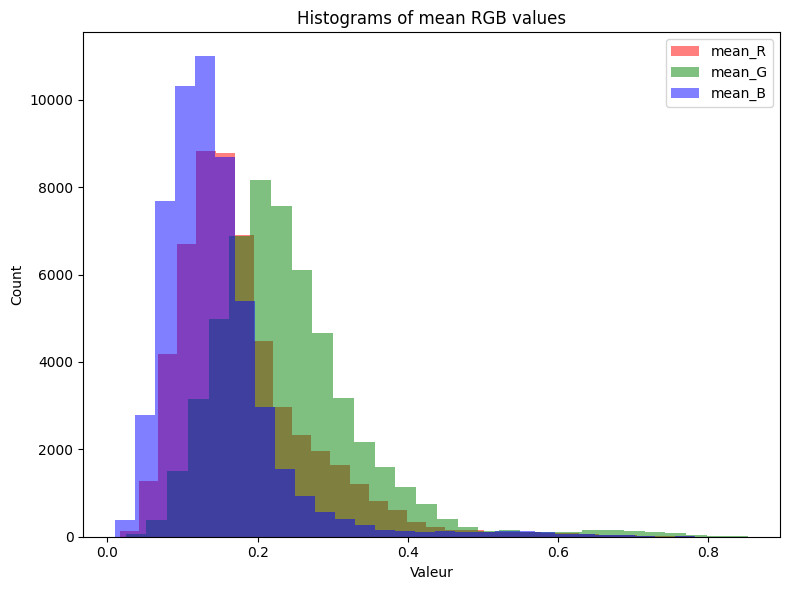

In [10]:
# Colonnes des moyennes des canaux RGB
rgb_means = ['mean_R', 'mean_G', 'mean_B']

# histogrammes superposés avec chaîne de couleurs
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for feat, col in zip(rgb_means, colors):
    plt.hist(df[feat].dropna(), bins=30, alpha=0.5, label=feat, color=col)
plt.title("Histograms of mean RGB values")
plt.xlabel("Valeur")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

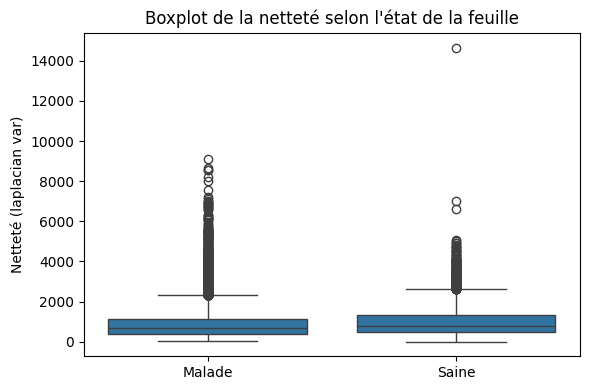

In [4]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Est_Saine', y='netteté')
plt.xticks([0,1], ['Malade','Saine'])
plt.title("Boxplot de la netteté selon l'état de la feuille")
plt.ylabel("Netteté (laplacian var)")
plt.xlabel("")
plt.tight_layout()
plt.show()

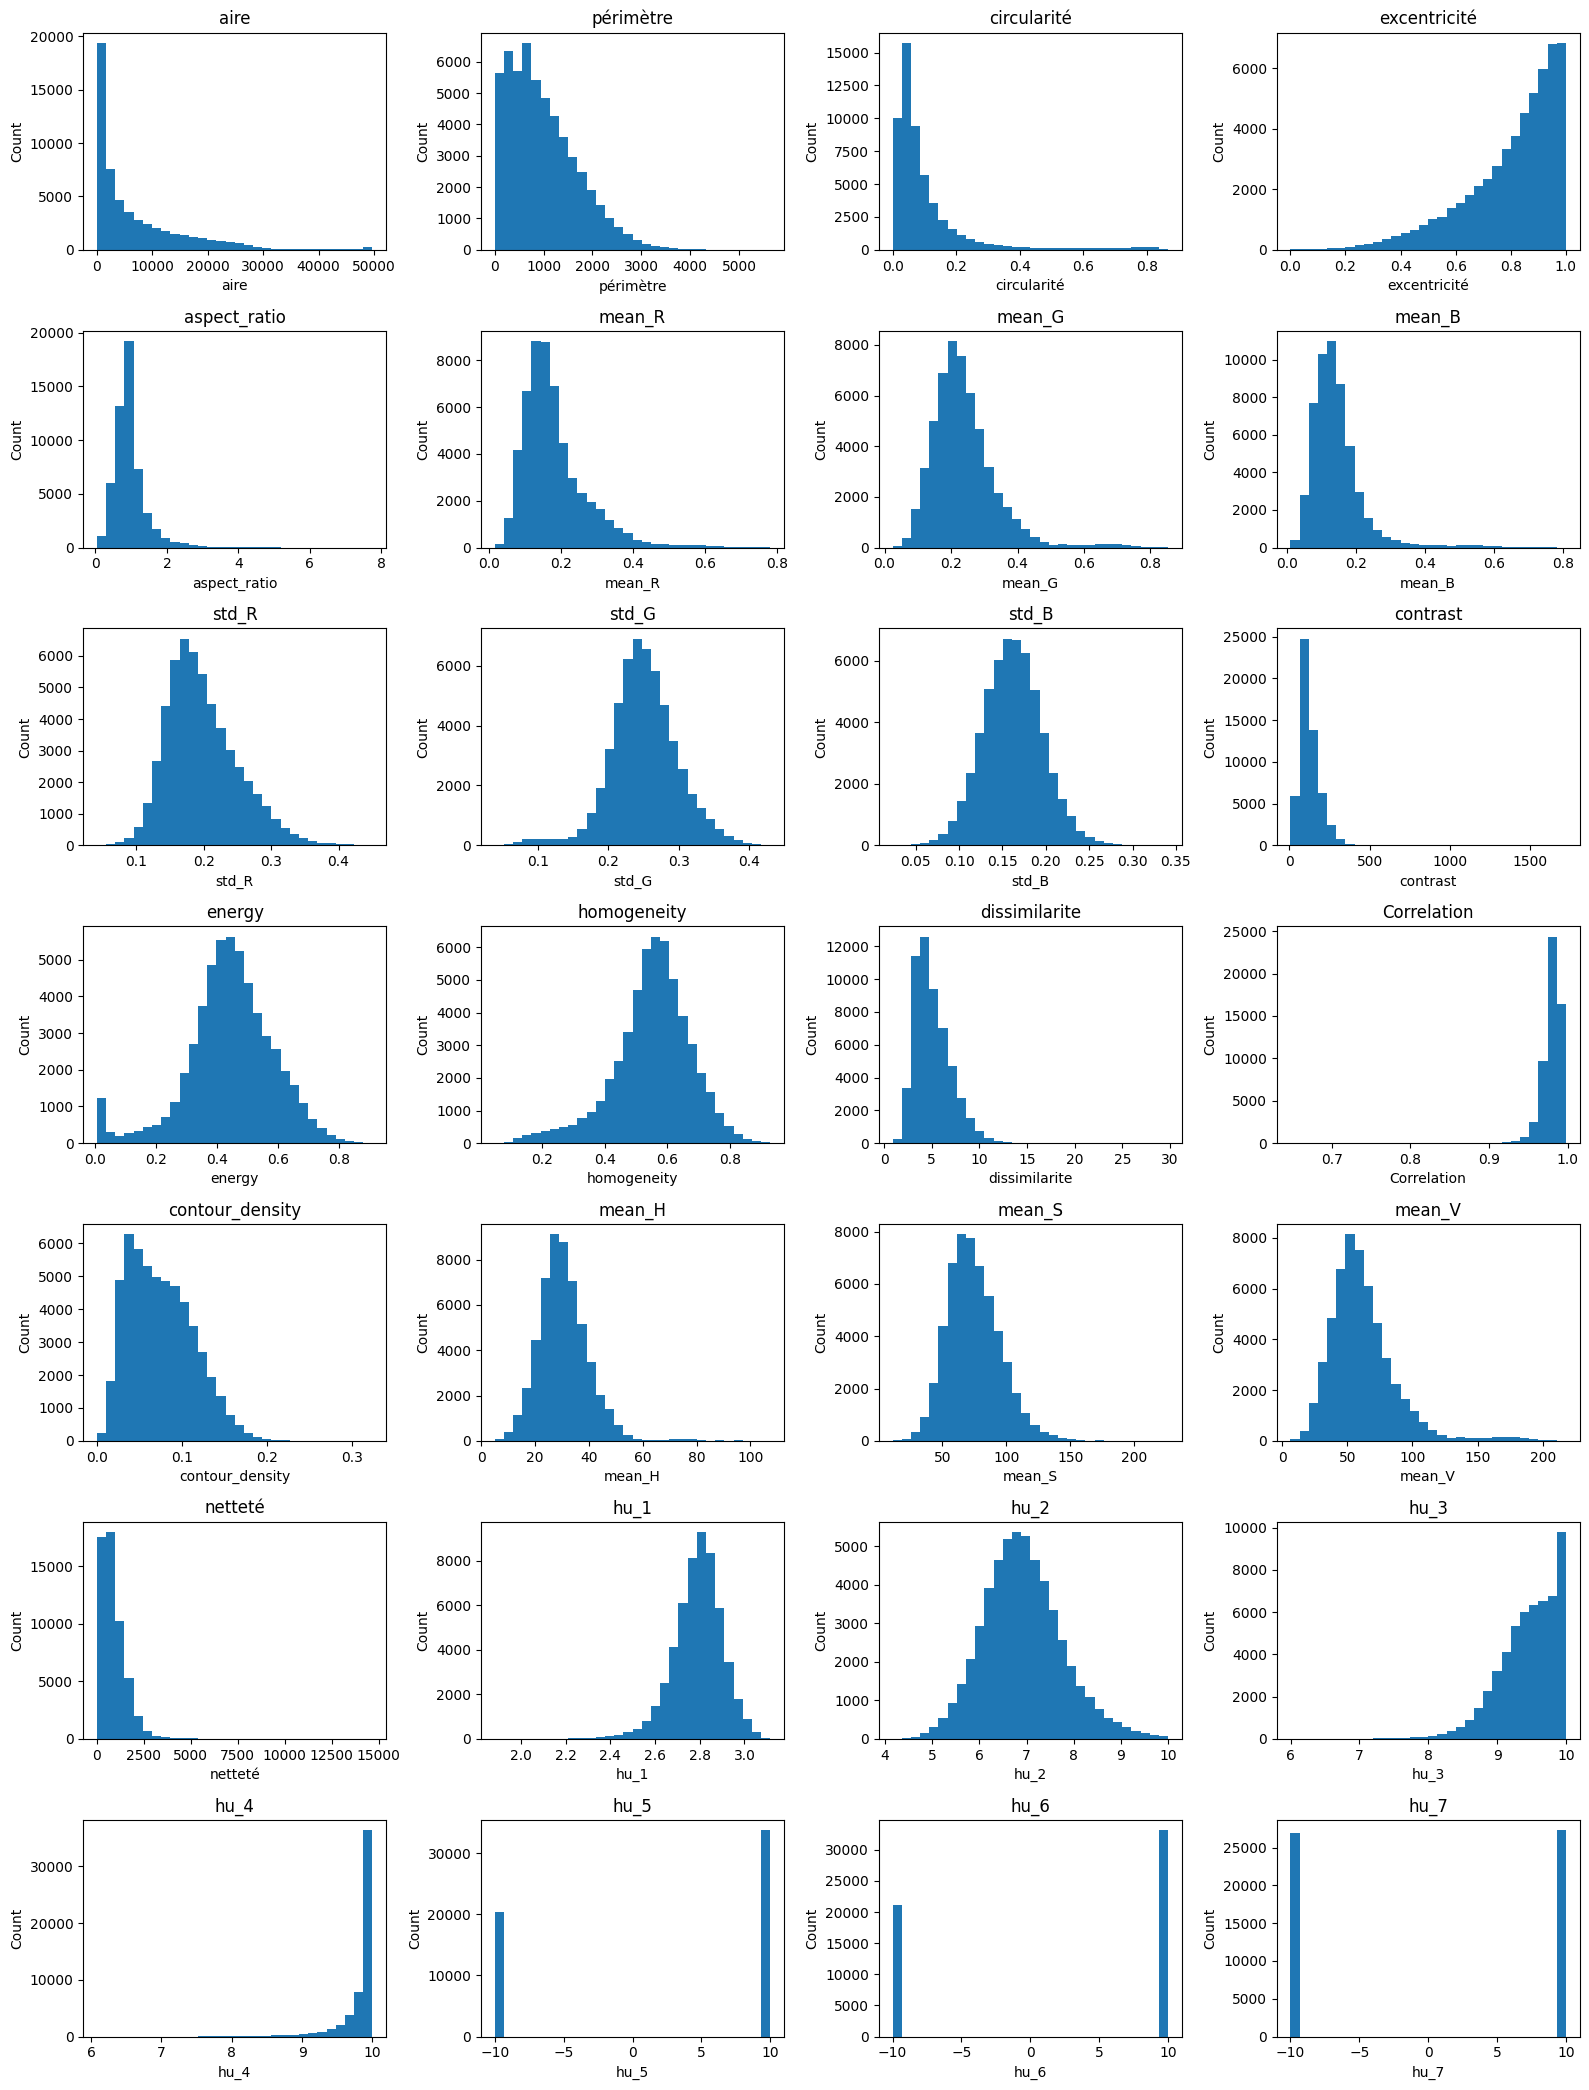

In [ ]:
# Affichage des histogrammes des caractéristiques du dataframe
# 1. Colonnes à exclure
exclude = ['ID_Image', 'Est_Saine', 'is_black', 'dimensions']
exclude += [col for col in df.columns if col.startswith(('plant_', 'disease_'))]

# 2. Sélection des features numériques à tracer
features = [
    col for col in df.select_dtypes(include=[np.number]).columns
    if col not in exclude
]

# 3. Définir la taille de la grille de subplots
n_features = len(features)
n_cols = 4
n_rows = int(np.ceil(n_features / n_cols))

# 4. Création des subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
axes = axes.flatten()

# 5. Boucle de tracé
for idx, feature in enumerate(features):
    ax = axes[idx]
    ax.hist(df[feature].dropna(), bins=30)
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# 6. Désactiver les sous-parcelles non utilisées
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

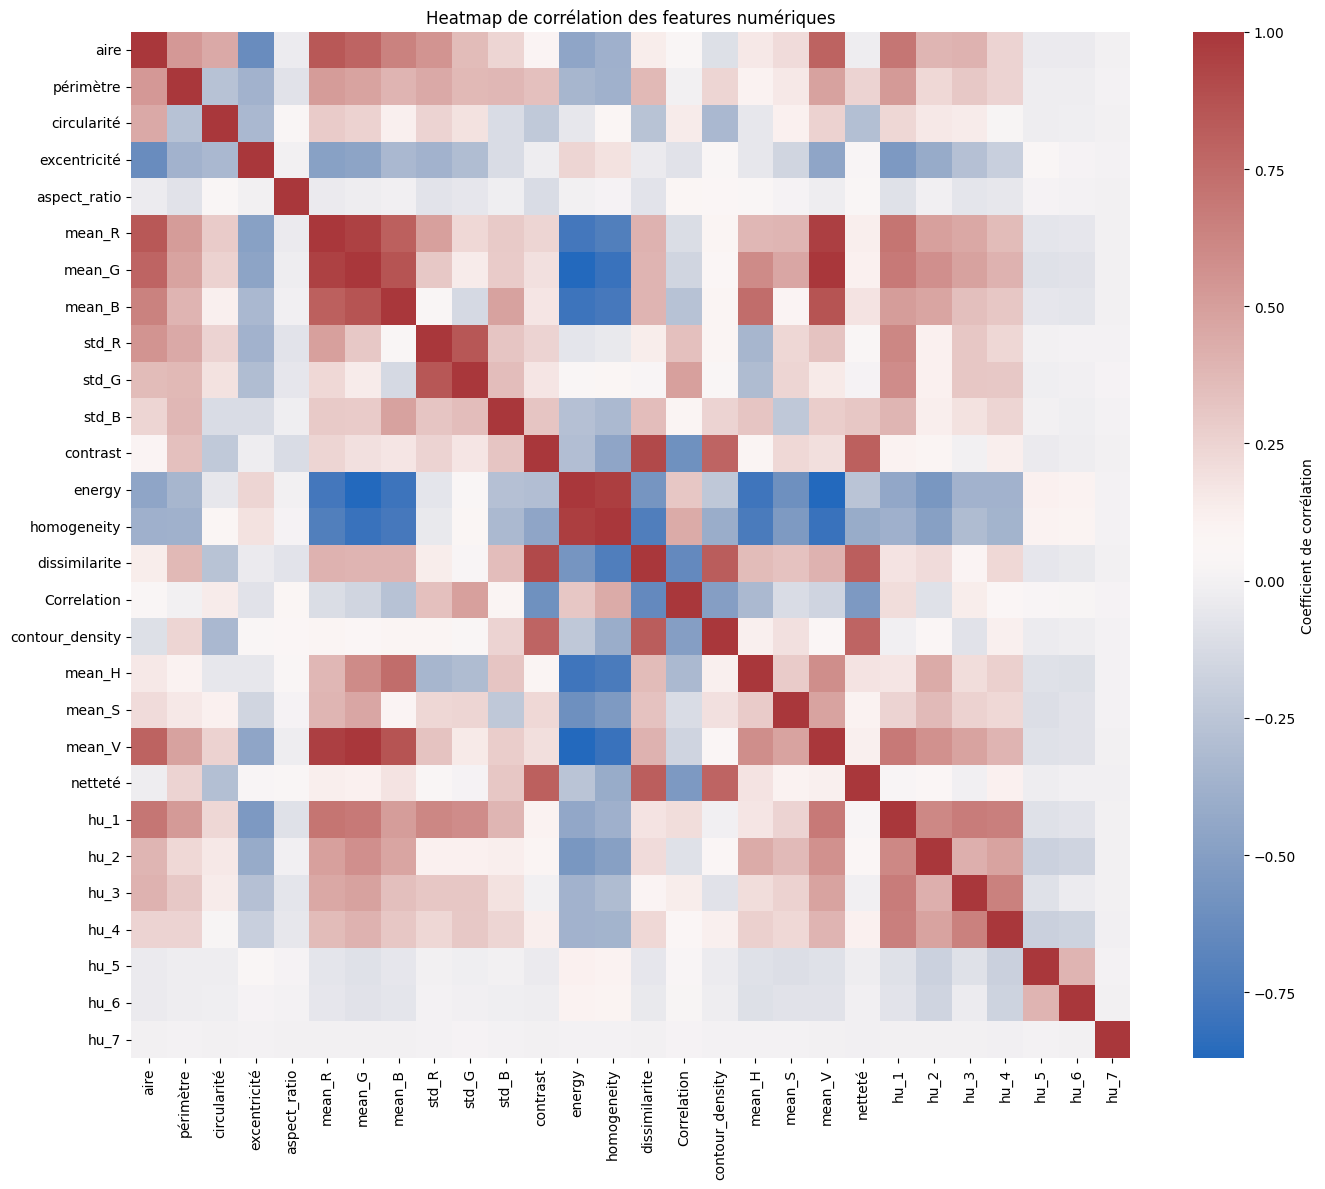

In [6]:
# Affichage de heatmap des caractéristiques du dataframe 
# 2. Colonnes à exclure (ID, labels, one-hot encodings)
exclude = ['ID_Image', 'Est_Saine', 'is_black', 'dimensions']
exclude += [col for col in df.columns if col.startswith(('plant_', 'disease_'))]

# 3. Sélection des features numériques
numeric_cols = [
    col for col in df.select_dtypes(include=[np.number]).columns
    if col not in exclude
]

# 4. Calcul de la matrice de corrélation
corr_matrix = df[numeric_cols].corr()

# 5. Affichage avec seaborn pour plus de lisibilité
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
#    mask=np.triu(np.ones_like(corr_matrix, dtype=bool)),  # masque la moitié supérieure
    cmap='vlag',                                           # palette divergeante
    annot=False,                                           # mettre True pour afficher les valeurs 
    fmt=".2f",
    cbar_kws={'label': 'Coefficient de corrélation'}
)
plt.title('Heatmap de corrélation des features numériques')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()